<a href="https://colab.research.google.com/github/Salma1-dev/gomycode_excersises/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://www.nlpr.ia.ac.cn/pal/trafficdata/tsrd-train.zip
!wget http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test.zip



--2021-10-02 08:10:56--  http://www.nlpr.ia.ac.cn/pal/trafficdata/tsrd-train.zip
Resolving www.nlpr.ia.ac.cn (www.nlpr.ia.ac.cn)... 159.226.21.81
Connecting to www.nlpr.ia.ac.cn (www.nlpr.ia.ac.cn)|159.226.21.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153887532 (147M) [application/zip]
Saving to: ‘tsrd-train.zip’

tsrd-train.zip      100%[===================>] 146.76M   270KB/s    in 9m 25s  

2021-10-02 08:20:22 (266 KB/s) - ‘tsrd-train.zip’ saved [153887532/153887532]

--2021-10-02 08:20:23--  http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test.zip
Resolving www.nlpr.ia.ac.cn (www.nlpr.ia.ac.cn)... 159.226.21.81
Connecting to www.nlpr.ia.ac.cn (www.nlpr.ia.ac.cn)|159.226.21.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44605416 (43M) [application/zip]
Saving to: ‘TSRD-Test.zip’

TSRD-Test.zip       100%[===================>]  42.54M   287KB/s    in 2m 42s  

2021-10-02 08:23:06 (268 KB/s) - ‘TSRD-Test.zip’ saved [44605416/

In [2]:
!mkdir data
!mkdir data/train
!mkdir data/test

!unzip tsrd-train.zip -d data/train
!unzip TSRD-Test.zip -d data/test

Streaming output truncated to the last 5000 lines.
 extracting: data/train/011_1_0055.png  
 extracting: data/train/011_1_0055_1_j.png  
 extracting: data/train/011_1_0056.png  
 extracting: data/train/011_1_0057.png  
 extracting: data/train/011_1_0058.png  
 extracting: data/train/011_1_0059.png  
 extracting: data/train/011_1_0060.png  
  inflating: data/train/011_1_0061.png  
 extracting: data/train/011_1_0062.png  
  inflating: data/train/011_1_0063.png  
  inflating: data/train/011_1_0064.png  
  inflating: data/train/011_1_0065.png  
  inflating: data/train/011_1_0066.png  
  inflating: data/train/011_1_0067.png  
  inflating: data/train/011_1_0068.png  
 extracting: data/train/011_0002.png  
 extracting: data/train/011_0003.png  
  inflating: data/train/011_0004.png  
 extracting: data/train/011_0005.png  
  inflating: data/train/011_0006.png  
 extracting: data/train/011_0007.png  
 extracting: data/train/011_0008.png  
 extracting: data/train/011_0009.png  
 extracting: data/

In [3]:
import tensorflow as tf
from tensorflow import keras
from __future__ import print_function, division
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from sklearn.metrics import confusion_matrix



In [4]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_labels = []
train_paths = []
train_df = None
for dir, sub_dir, files in os.walk("/content/data/train/"):
    if dir != "/content/data/train/":
        break

    else:
        for image_file in files:
            label = int(image_file.split("_")[0])
            path = dir + image_file

            train_labels.append(label)
            train_paths.append(path)
        train_df = pd.DataFrame({"images":train_paths, "labels":train_labels})

from sklearn.model_selection import train_test_split

train_df["labels"] = train_df["labels"].apply(str)
train_df, test_df  = train_test_split(train_df, test_size=0.3,stratify=train_df["labels"])


train_generator=train_datagen.flow_from_dataframe(dataframe=train_df, \
            x_col="images", y_col="labels", \
            class_mode="categorical", target_size=(331,331), batch_size=32)
#val_generator=val_datagen.flow_from_dataframe(dataframe=val_df, \
#            x_col="images", y_col="labels", class_mode="categorical", target_size=(331,331), \
#            batch_size=32)
test_generator=test_datagen.flow_from_dataframe(dataframe=test_df, \
            x_col="images", y_col="labels", class_mode="categorical", target_size=(331,331), \
            batch_size=10)


Found 2919 validated image filenames belonging to 58 classes.
Found 1251 validated image filenames belonging to 58 classes.


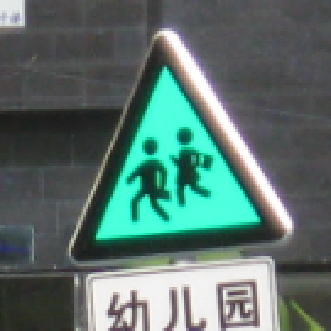

In [5]:
import cv2 
images  = next(train_generator)[0]
from google.colab.patches import cv2_imshow 
cv2_imshow(images[3])

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from keras.layers import MaxPooling2D

def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(331, 331, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(58, activation='softmax'))
  return model


In [29]:
model = define_model()
model.compile(loss="categorical_crossentropy", metrics="accuracy", optimizer=Adam() )

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 331, 331, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 165, 165, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 871200)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                55756864  
_________________________________________________________________
dense_3 (Dense)              (None, 58)                3770      
Total params: 55,761,530
Trainable params: 55,761,530
Non-trainable params: 0
_________________________________________________________________


In [31]:
test_logits = model.predict_generator(test_generator,steps = 125)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [32]:
len(test_logits)

1251

In [34]:
test_df["labels"]

3151    52
1558    28
3627    55
2596    16
1165     7
        ..
3838    15
1029    14
3171    54
3054    54
3971     3
Name: labels, Length: 1251, dtype: object

In [53]:
import numpy as np
y_true = test_df["labels"].values.astype("int")
y_pred = np.argmax(test_logits,axis=1)
cnf = confusion_matrix(y_true, y_pred)

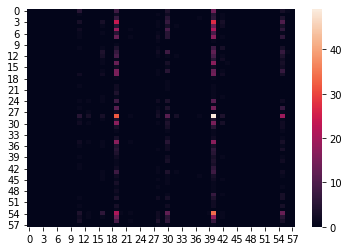

In [55]:
import seaborn as sns
sns.heatmap(cnf)

In [40]:
y_true

3151    52
1558    28
3627    55
2596    16
1165     7
        ..
3838    15
1029    14
3171    54
3054    54
3971     3
Name: labels, Length: 1251, dtype: object

In [42]:
y_pred

array([0.6943856 , 0.569092  , 0.99991715, ..., 0.9963516 , 0.8104421 ,
       0.99997914], dtype=float32)

In [47]:
np.argmax(test_logits,axis=1)

array([55, 55, 55, ..., 19, 40, 19])